# Welcome to the AMID analysis Notebook!

The next few blocks, each with very little code, allows easy analysis of AMID data (from Novonix UHPC files only, for now) with some flexibility for naming files and creating directories without the need to copy the original datafile anywhere.

The text preceeding each cell gives some information on options for the calls to the code.

Reminder: to run a block press "shift+enter". All blocks with text, like this one, can be skipped over.

In [6]:
from amid import AMID

In [7]:
#import matplotlib as mpl
#print(mpl.get_configdir())
#import matplotlib.pyplot as plt
#print(plt.style.available)

### Directory structure

*dstpath*: the location on your computer that will serve as the base directory to save things. On Windows, if it does not start with "C:" then the directory where this notebook is located is used as reference.

*srcpath*: the location on your computer (or remote server if connected via VPN) where the UHPC AMID file is located.

*uhpc_file*: the name of the AMID UHPC file. Be sure to include the .csv file extension.

*cell_label*: an identifier for your analysis. If a directory \[dstpath\]\\\[cell_label\] does not exist, one is created. *cell_label* is also used when saving figures and in legends. This allows users to perform different analyses on the same AMID UHPC file without having to make new directories or copy the file anywhere.


In [34]:
dstpath = '/home/mcormier/projects/diffusion/analysis/2021-12-02_ME6/'
srcpath = '/home/mcormier/media/cell_data/_NovonixHPC_Data/'
uhpc_file = '211123_CN_N2955_43to3V_AMID_MC_System5_33.csv'
cell_label = 'N2955'

### The AMID object

Instantiating the AMID object is easy! The resulting variable (in this case *amid_data*) contains parsed data from the AMID protocol. You should read the output to be sure it is giving the information you expect!

In [35]:
amid_data = AMID(dstpath, srcpath, uhpc_file, cell_label, export_data=True, use_input_cap=True)

Create directory: /home/mcormier/projects/diffusion/analysis/2021-12-02_MH1/N2955
Working on cell: 211123_CN_N2955_43to3V_AMID_MC.csv
Positive electrode active mass: 0.0024 g
Input cell capacity: 0.000473884 Ah
Index(['Date and Time', 'Cycle', 'Step', 'Time', 'Step Time (h)', 'Current',
       'Potential', 'Capacity', 'Temperature (°C)', 'Circuit Temperature (°C)',
       'Energy (Wh)', 'dVdt (I/h)', 'dIdt (V/h)', 'Step Number',
       'Step position'],
      dtype='object')
[ 7  8  9 10  2  0]
Indices being removed to time non-monotonicity: []
Indices being removed due to negative voltage: []
[  7   9  11  13  15  17  19  21  23  25  27  29  31  33  35  37  39  41
  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71  73  75  77
  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107 109 111 113
 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143 145 147]
First signature curve step: 6
Last signature curve step: 148
Specific Capacity achieved in advanced protocol: 

/home/mcormier/git/amid/amid.py:376: RuntimeWarning: divide by zero encountered in double_scalars
  rate = self.capacity / np.average(currents)


Found 8 signature curves.
Cutoff voltages: [4.2 4.1 4.  3.9 3.8 3.7 3.6 3. ]
Midpoint voltages: [4.25 4.15 4.05 3.95 3.85 3.75 3.65 3.3 ]
Voltage intervals widths: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.6]
Voltage interval labels: ['4.30 V - 4.20 V', '4.20 V - 4.10 V', '4.10 V - 4.00 V', '4.00 V - 3.90 V', '3.90 V - 3.80 V', '3.80 V - 3.70 V', '3.70 V - 3.60 V', '3.60 V - 3.00 V']
Found 8 voltage intervals.
Done parsing signature curves.


### Make some plots!

You can now make the standard plots. For each plotting method, figures are saved by default. If you would prefer to not have them saved automatically, you can pass *save=False*. e.g. amid_data.plot_protocol(save=False). All figures get saved in the directory \[*dstpath*\]\\\[*cell_label*\].

NOTE: in this particular example, there is an OCV step after the discharge preceeding the signature curves (the C/0 discharge in the legend). I don't know whether this was intentional or erroneous since it changes the starting voltage.

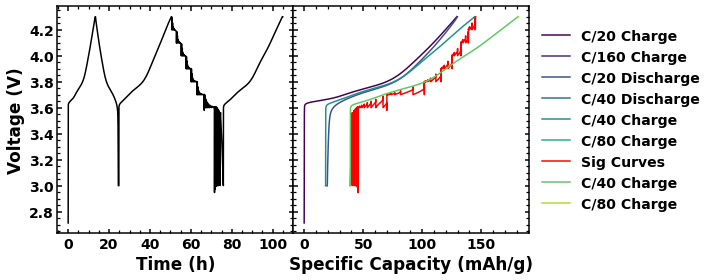

In [36]:
amid_data.plot_protocol()

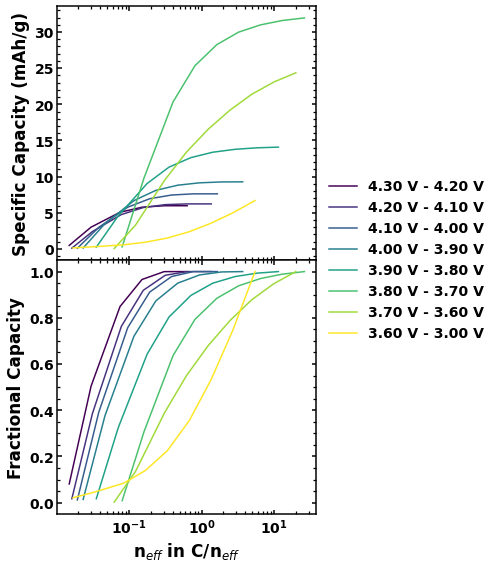

In [37]:
amid_data.plot_caps()

### It's time to fit the data! 
You must pass the *PARTICLE RADIUS IN CM* to the *fit_atlung()* method. In this example, I pass $r=0.5\ \mu$m. 

Optional arguments:

*ftol*: the tolerance criteria for the fits. If fits are poor, try making smaller. If a RuntimeWarning is raised, try making larger. You may still get a good fit despite a RuntimeWarning being raised. Defaults to 5e-14.

*D_bounds*: bounds for $D_c$. Needs to be a list with the lower and upper bound.

*shape*: particle geometry. Currently supports "sphere" and "plane". Defaults to "sphere".

*nalpha*: the number of expansion coefficients to use in the Atlung expression. Default to 150.

*nQ* : the number of Q values (on a log scale) to use in the theorical Atlung curve, $\tau$ vs $Q$, for comparing fit quality. Default is 2000. There is normally no reason to change this.

*save*: whether or not to save figures comparing theory to fitted values for each voltage interval. Default is True.

*label*: an additional label that be used for saving figures and data. For example, perhaps one wishes to use different particle sizes, then "label=r1" and "label=r2" could be used in 2 separate calls to fit_atlung().

Returns: data to needed to make summary graph.

In [38]:
fit_data = amid_data.fit_atlung(4.2e-4, ftol=1e-14, save=True, D_bounds=[1e-15, 1e-10])

/home/mcormier/anaconda3/envs/spyder-env/lib/python3.9/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/mcormier/anaconda3/envs/spyder-env/lib/python3.9/site-packages/scipy/optimize/_lsq/common.py:154: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = phi / phi_prime
/home/mcormier/anaconda3/envs/spyder-env/lib/python3.9/site-packages/scipy/optimize/_lsq/common.py:166: RuntimeWarning: divide by zero encountered in double_scalars
  p *= Delta / norm(p)
/home/mcormier/anaconda3/envs/spyder-env/lib/python3.9/site-packages/scipy/optimize/_lsq/common.py:166: RuntimeWarning: invalid value encountered in multiply
  p *= Delta / norm(p)
/home/mcormier/anaconda3/envs/spyder-env/lib/python3.9/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: invalid value encountered in double_scalars
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/home/mcormier/anacond

Fitted Dc: [7.19594980e-11 8.86602429e-11 8.50348810e-11 7.81093521e-11
 3.86627089e-11 1.66447543e-11 9.44492462e-12 8.71915408e-12]
Standard deviations from fit: [4.39955202e-14 3.45186580e-14 4.22496343e-14 4.08951843e-14
 3.14199189e-11 2.86259622e-11 2.84338165e-11 1.35060008e-11]
Atlung fit error: [0.10755589 0.0726072  0.061633   0.04495396 0.02490419 0.02551369
 0.03828412 0.07662759]


### Make the summary graph!

Need to pass the returned values from fit_atlung() to this method as the first argument.

Optional arguments: 

*label*: An additional label to saving the figure in case multiple of these are to be generated. The same label as when calling fit_atlung() should be used.

*save*: whether or not to save the figure.

/home/mcormier/anaconda3/envs/spyder-env/lib/python3.9/site-packages/matplotlib/ticker.py:2938: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
/home/mcormier/anaconda3/envs/spyder-env/lib/python3.9/site-packages/matplotlib/ticker.py:2938: RuntimeWarning: invalid value encountered in double_scalars
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


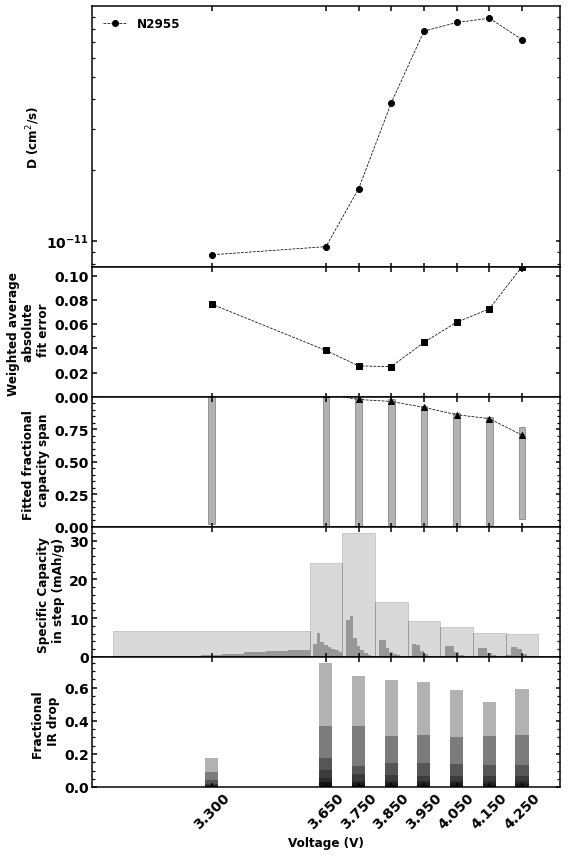

In [39]:
amid_data.make_summary_graph(fit_data, label='r-4.2um')